In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.shape

(962, 2)

# Exploring Categories

In [4]:
df.Category.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

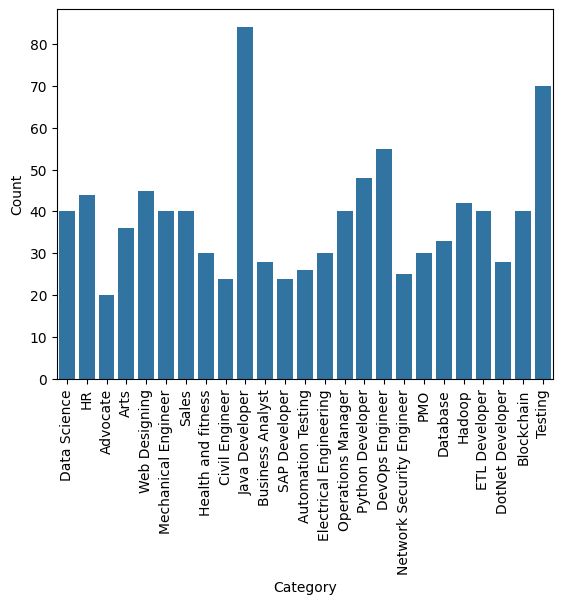

In [14]:
sns.countplot(x="Category", data=df)
plt.xticks(rotation=90)   
plt.ylabel("Count")   
plt.xlabel("Category")   
plt.show()


([<matplotlib.patches.Wedge at 0x1b5e22c8910>,
 [Text(1.058871227218848, 0.29797940225467084, 'Data Science'),
  Text(0.7841417277955074, 0.7714413462667635, 'HR'),
  Text(0.41347312332933783, 1.0193331036929403, 'Advocate'),
  Text(0.053862303159734344, 1.0986805051052508, 'Arts'),
  Text(-0.27717597647551645, 1.0645062132579801, 'Web Designing'),
  Text(-0.5706079221763859, 0.9404289442321242, 'Mechanical Engineer'),
  Text(-0.8089120194310812, 0.7454269547178518, 'Sales'),
  Text(-0.9773197556910534, 0.5048228353947349, 'Health and fitness'),
  Text(-1.0745481947062527, 0.23525768266633296, 'Civil Engineer'),
  Text(-1.0988505276751686, -0.05027442518820011, 'Java Developer'),
  Text(-1.0485773817141402, -0.3323935537243749, 'Business Analyst'),
  Text(-0.9271404255154017, -0.5919549234317762, 'SAP Developer'),
  Text(-0.7427816407083776, -0.8113417493427605, 'Automation Testing'),
  Text(-0.5207133706140742, -0.9689466371600295, 'Electrical Engineering'),
  Text(-0.2910572162881381

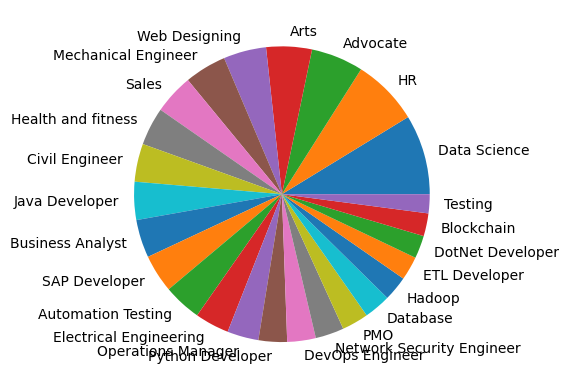

In [17]:
counts = df.Category.value_counts()
labels = df.Category.unique()

plt.pie(counts,labels=labels)

# Exploring Resume Column

In [20]:
df.Resume[90]

'Skills: Natural Languages: Proficient in English, Hindi and Marathi. Computer skills: Proficient with MS-Office, Internet operation.Education Details \r\nJanuary 2015 to January 2018 LLB Law Mumbai, Maharashtra Mumbai university\r\nJanuary 2015 B.M.M  Mumbai, Maharashtra S.K.Somaiya College, Mumbai University\r\n H.S.C   Asmita Girls junior College, Maharashtra Board\r\n S.S.C Vidya Bhawan  Maharashtra Board\r\nAdvocate \r\n\r\nLlb student and Journalist\r\nSkill Details \r\nCompany Details \r\ncompany - Criminal lawyer (law firm)\r\ndescription - '

# Cleaning Data:

### 1)URLs,
### 2)Hashtags,
### 3)Mentions,
### 4)Special Lettres,
### 5)Punctuations,
### 6) Remove Stopwords



In [40]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub(r'\b(RT|cc)\b', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [41]:
cleanResume("my website ##### () is like http://azizbenltaief.com or you can access it at azizbenltaief@gmail.com")

'my website is like or you can access it at azizbenltaief '

In [42]:
df['Resume'] = df['Resume'].apply(cleanResume)

In [43]:
df.Resume[90]

'Skills Natural Languages Proficient in English Hindi and Marathi Computer skills Proficient with MS Office Internet operation Education Details January 2015 to January 2018 LLB Law Mumbai Maharashtra Mumbai university January 2015 B M M Mumbai Maharashtra S K Somaiya College Mumbai University H S C Asmita Girls junior College Maharashtra Board S S C Vidya Bhawan Maharashtra Board Advocate Llb student and Journalist Skill Details Company Details company Criminal lawyer law firm description '

In [49]:
import spacy
nlp = spacy.load("en_core_web_sm")
def stopword_removal(text):
    doc = nlp(text)
    filtered_text = []
    for token in doc:
        if token.is_stop == False:
            filtered_text.append(token.text)
    return " ".join(filtered_text)

In [50]:
def lemmatization(text):
    doc = nlp(text)
    filtered_text = []
    for token in doc:
        filtered_text.append(token.lemma_.lower())
    return " ".join(filtered_text)

In [51]:
df["Resume_without_stopwords"] = df["Resume"].apply(stopword_removal)

In [52]:
df["Resume_Cleaned"] = df["Resume_without_stopwords"].apply(lemmatization)

In [53]:
df.head()

,Category,Resume,Resume_without_stopwords,Resume_Cleaned
0,6,Skills Programming Languages Python pandas num...,Skills Programming Languages Python pandas num...,skills programming languages python panda nump...
1,6,Education Details May 2013 to May 2017 B E UIT...,Education Details 2013 2017 B E UIT RGPV Data ...,education details 2013 2017 b e uit rgpv data ...
2,6,Areas of Interest Deep Learning Control System...,Areas Interest Deep Learning Control System De...,areas interest deep learning control system de...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,skills r python sap hana tableau sap hana sql ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...,Education Details MCA YMCAUST Faridabad Haryan...,education detail mca ymcaust faridabad haryana...


# Transforming Category Column into numeric

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
df['Category'] = le.fit_transform(df["Category"])

In [48]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Transforming Resume Column into Numerical Vector

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df["Resume_Cleaned"])
requiredText = tfidf.transform(df["Resume_Cleaned"])

# Splitting

In [60]:
from sklearn.model_selection import train_test_split
X = requiredText
Y = df["Category"]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [61]:
x_train.shape

(769, 6612)

In [57]:
x_test.shape

(193,)

In [58]:
y_train.shape

(769,)

# Train the Model

In [62]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
          17       1.00    

In [64]:
clf.score(x_test,y_test)

0.9844559585492227

# Prediction System

In [73]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(le,open('encoder.pkl','wb'))

In [68]:
import pickle

def pred(myresume) :
    # Load the pretrained model
    clf=pickle.load(open('clf.pkl','rb'))

    # Clean the input resume
    cleaned_resume = cleanResume(myresume)

    # Remove stopwords
    cleaned_resume_no_stopwords = stopword_removal(cleaned_resume)

    # Lemmatization of the cleaned resume
    cleaned_resume_lemmatization = lemmatization(cleaned_resume_no_stopwords)

    # Transform the cleaned resume using the trained TF-IDF vectorizer
    input_features = tfidf.transform([cleaned_resume_lemmatization])

    # Convert sparse matrix to dense
    input_features = input_features.toarray()

    # Predict the category using the pretrained model
    prediction_id = clf.predict(input_features)

    # Map the predicted label back to the original category name
    predicted_category_name = le.inverse_transform(prediction_id)

    return predicted_category_name

In [69]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

pred(myresume)

array(['Data Science'], dtype=object)

In [70]:
myresume = """
Sarah Williams is a dedicated and skilled advocate with over 10 years of experience in providing legal representation to clients across various sectors, including criminal law, civil litigation, and family law. With a deep understanding of legal procedures and case law, Sarah has successfully handled numerous cases in the courtroom, negotiating favorable settlements and providing expert legal advice to individuals and businesses.

She holds a law degree from XYZ University and is a licensed attorney, practicing law in multiple jurisdictions. Sarah is passionate about ensuring justice is served and strives to make legal processes more accessible to her clients. She is known for her excellent research and analytical skills, attention to detail, and commitment to upholding the law with integrity.

Key Skills:
- Criminal Law
- Civil Litigation
- Family Law
- Contract Law
- Legal Research and Writing
- Courtroom Advocacy
- Legal Counseling and Advice
- Client Relationship Management
- Legal Compliance and Regulations
- Negotiation and Settlement

Certifications and Licenses:
- Licensed Attorney at Law, XYZ State Bar
- Certification in Criminal Law, XYZ University

Education:
JD in Law, XYZ University, 2010-2013

Professional Experience:
- Senior Advocate at ABC Law Firm (2016-Present)
- Associate Advocate at DEF Legal Group (2013-2016)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Advocate-focused resume
pred(myresume)

array(['Advocate'], dtype=object)

In [72]:
myresume = """
John Doe is an experienced Network Security Engineer with over 7 years of expertise in designing, implementing, and managing network security infrastructures. Specializing in safeguarding critical network systems, John has worked with various organizations to protect against cyber threats, data breaches, and unauthorized access. He is proficient in deploying firewalls, intrusion detection systems (IDS), VPNs, and network monitoring tools to ensure the integrity and security of networks.

John holds a degree in Computer Science and certifications in several cybersecurity domains, including Certified Information Systems Security Professional (CISSP), Certified Ethical Hacker (CEH), and Cisco Certified Network Associate (CCNA). He has extensive experience in troubleshooting and resolving network vulnerabilities, and has played a key role in conducting security audits and risk assessments.

Key Skills:
- Network Security Architecture
- Firewall Management and Configuration
- Intrusion Detection and Prevention Systems (IDS/IPS)
- Virtual Private Networks (VPNs)
- Security Audits and Risk Assessments
- Cybersecurity Incident Response
- Network Monitoring and Traffic Analysis
- Vulnerability Assessment and Penetration Testing
- Data Encryption and Secure Communications

Certifications:
- CISSP (Certified Information Systems Security Professional)
- CEH (Certified Ethical Hacker)
- CCNA (Cisco Certified Network Associate)
- CompTIA Security+

Education:
BSc in Computer Science, XYZ University, 2012-2016

Professional Experience:
- Network Security Engineer at ABC Corp (2016-Present)
- IT Security Specialist at DEF Solutions (2014-2016)

Languages:
- English (Fluent)
- French (Intermediate)
"""

# Now, test the model with the Network Security Engineer-focused resume
pred(myresume)

array(['Network Security Engineer'], dtype=object)